# 2A.ml - Réduction d'une forêt aléatoire - énoncé

Le modèle Lasso permet de sélectionner des variables, une forêt aléatoire produit une prédiction comme étant la moyenne d'arbres de régression. Et si on mélangeait les deux ?

In [137]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [138]:
%matplotlib inline

## Datasets

Comme il faut toujours des données, on prend ce jeu [Boston](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html).

In [139]:
from sklearn.datasets import load_boston
data = load_boston()
X, y = data.data, data.target

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [141]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

## Q1 : caler une forêt aléatoire

In [142]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [143]:
model = RandomForestRegressor(n_estimators=20)
model.fit(X_train, y_train)

# dt = DecisionTreeRegressor()
# dt.fit(X_train, y_train)



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=20,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [144]:
model.estimators_

[DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=2084138045, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=214415392, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2,

In [145]:
len(model.estimators_)

20

## Q2 : calculer soi-même la moyenne des prédictions des arbres de la forêt aléatoire

C'est peut-être inutile mais ça permet de s'assurer que la prédiction d'une forêt aléatoire est bien issue de la moyenne des prédictions d'un ensemble d'arbre de régression.

In [146]:
pred_rf = model.predict(X_test)

In [147]:
print(X_test.shape)

(127, 13)


In [148]:
print(pred_rf.shape)

(127,)


In [149]:
pred_rf

array([33.575, 19.93 , 47.07 , 17.165, 12.9  , 22.725, 21.18 , 20.5  ,
       23.83 , 19.53 , 19.35 , 15.265, 23.36 , 34.745, 16.065, 29.92 ,
       29.96 , 20.84 , 19.42 , 14.245, 19.19 , 18.815, 23.855, 26.42 ,
       33.755, 26.35 , 13.895, 23.575, 44.77 , 21.285, 23.505, 23.685,
       19.365, 19.545, 22.105, 17.255, 22.12 , 19.125, 23.515, 17.42 ,
       20.56 , 25.835,  7.75 , 26.28 , 29.47 , 19.955, 31.845, 24.445,
       11.765, 23.975, 22.8  , 10.575, 18.235, 47.07 , 15.32 , 44.7  ,
        9.29 , 19.195, 27.375, 13.94 , 25.505, 16.975, 21.805, 13.18 ,
       21.21 , 34.32 , 15.705, 24.64 , 16.235, 47.935,  9.205, 27.46 ,
       21.375,  7.355, 22.95 , 19.625, 11.16 , 34.17 , 19.19 , 24.675,
       32.41 , 20.305, 14.955, 10.04 , 31.725, 13.49 , 18.565, 12.3  ,
       19.615, 21.015, 22.72 , 20.65 , 13.715, 20.03 , 19.615, 26.085,
       23.62 , 21.365, 22.365, 17.02 , 17.49 , 33.535, 34.32 , 20.39 ,
       26.55 , 11.32 , 34.285, 23.935, 20.875, 20.17 , 10.28 , 15.04 ,
      

In [150]:
import numpy as np
pred_manuel = np.zeros(y_test.shape)

In [151]:
for i, Xi in enumerate(X_test):
    
    #Reshape des Xi
    Xi = Xi.reshape(1, -1)
    
    arbres_out_Xi = [arbre.predict(Xi) for arbre in model.estimators_]
    pred_manuel[i] = np.mean(arbres_out_Xi)

In [152]:
pred_manuel

array([33.575, 19.93 , 47.07 , 17.165, 12.9  , 22.725, 21.18 , 20.5  ,
       23.83 , 19.53 , 19.35 , 15.265, 23.36 , 34.745, 16.065, 29.92 ,
       29.96 , 20.84 , 19.42 , 14.245, 19.19 , 18.815, 23.855, 26.42 ,
       33.755, 26.35 , 13.895, 23.575, 44.77 , 21.285, 23.505, 23.685,
       19.365, 19.545, 22.105, 17.255, 22.12 , 19.125, 23.515, 17.42 ,
       20.56 , 25.835,  7.75 , 26.28 , 29.47 , 19.955, 31.845, 24.445,
       11.765, 23.975, 22.8  , 10.575, 18.235, 47.07 , 15.32 , 44.7  ,
        9.29 , 19.195, 27.375, 13.94 , 25.505, 16.975, 21.805, 13.18 ,
       21.21 , 34.32 , 15.705, 24.64 , 16.235, 47.935,  9.205, 27.46 ,
       21.375,  7.355, 22.95 , 19.625, 11.16 , 34.17 , 19.19 , 24.675,
       32.41 , 20.305, 14.955, 10.04 , 31.725, 13.49 , 18.565, 12.3  ,
       19.615, 21.015, 22.72 , 20.65 , 13.715, 20.03 , 19.615, 26.085,
       23.62 , 21.365, 22.365, 17.02 , 17.49 , 33.535, 34.32 , 20.39 ,
       26.55 , 11.32 , 34.285, 23.935, 20.875, 20.17 , 10.28 , 15.04 ,
      

A priori, c'est la même chose.

In [153]:
loss_rf = np.mean((y_test - pred_rf)**2)
print("Loss RF = {}".format(loss_rf))

Loss RF = 9.553569291338583


In [154]:
loss_manuel = np.mean((y_test - pred_rf)**2)
print("Loss manuelle = {}".format(loss_manuel))

Loss manuelle = 9.553569291338583


In [155]:
from sklearn.metrics import r2_score

In [156]:
print("R2 score random forest train = {}".format(r2_score(y_train, model.predict(X_train))))
print("R2 score random forest = {}".format(r2_score(y_test, pred_rf)))

R2 score random forest train = 0.9718935090220453
R2 score random forest = 0.8822467234049356


## Q3 : Pondérer les arbres à l'aide d'une régression linéaire

La forêt aléatoire est une façon de créer de nouvelles features, 100 exactement qu'on utilise pour caler une régression linéaire. A vous de jouer.

In [163]:
def new_features(rf, X):
    
    X_new = np.zeros((X.shape[0], len(rf.estimators_)))
    
    for i, Xi in enumerate(X):

        #Reshape des Xi
        Xi = Xi.reshape(1, -1)

        arbres_out_Xi = [arbre.predict(Xi) for arbre in rf.estimators_]
    
        X_new[i, :] = arbres_out_Xi
    
    return X_new


X_train_2 = new_features(model, X_train)

In [169]:
print("taille de X_train initial: {}".format(X_train.shape))
print("taille de X_train_2 (après application de la foret): {}".format(X_train_2.shape))

taille de X_train initial: (379, 13)
taille de X_train_2 (après application de la foret): (379, 20)


In [165]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_2, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [170]:
X_test_2 = new_features(model, X_test)

pred_new = lr.predict(X_test_2)

In [171]:
pred_new

array([33.27191712, 19.60241919, 47.69087883, 17.78115139, 12.27128687,
       22.28083262, 22.06769544, 19.52368335, 24.42609438, 19.12617623,
       19.40857102, 16.04100869, 24.5111586 , 36.23246484, 15.56369408,
       31.575048  , 29.77430381, 21.76517779, 19.10509595, 14.11166308,
       18.57863749, 19.3075195 , 23.71312537, 26.71927137, 33.13739908,
       26.53431259, 13.39034797, 23.55932161, 42.86179936, 21.03299964,
       23.27939187, 24.02676769, 20.39918828, 19.2492622 , 19.57277839,
       16.92407016, 22.14905771, 19.01469482, 23.3621443 , 15.83303258,
       20.49451844, 26.31588485,  6.9665726 , 25.98347666, 29.60318921,
       19.5107925 , 32.80779616, 23.96521067, 11.27981626, 23.32246172,
       22.27446048,  9.99386883, 18.22095816, 47.41706751, 15.09353598,
       45.22984426,  9.43350912, 18.89264425, 27.56632335, 12.609871  ,
       25.74894027, 16.92291211, 21.90940798, 12.44930402, 21.35307138,
       36.39016802, 14.88146909, 24.75734412, 16.5081395 , 47.87

In [173]:
print("R2 score random forest linear regression train = {}".format(r2_score(y_train, lr.predict(X_train_2))))
print("R2 score random forest linear regression = {}".format(r2_score(y_test, pred_new)))

R2 score random forest linear regression train = 0.983116246244555
R2 score random forest linear regression = 0.8708251972679967


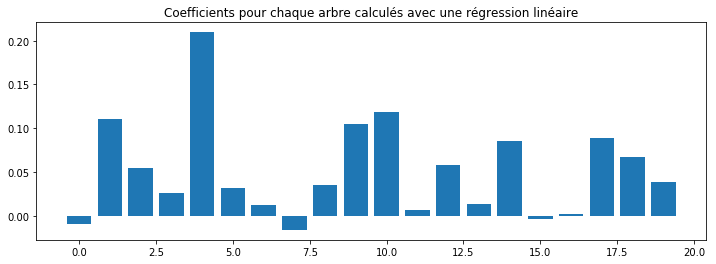

In [175]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.bar(np.arange(0, len(lr.coef_)), lr.coef_)
ax.set_title("Coefficients pour chaque arbre calculés avec une régression linéaire");

## Q4 : Que se passe-t-il si on remplace la régression linéaire par un Lasso ?

Petit rappel : le [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) est une façon de sélectionner les variables.

In [217]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=100.)
lasso.fit(X_train_2, y_train)

Lasso(alpha=100.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [218]:
pred_lasso = lasso.predict(X_test_2)

In [219]:
pred_lasso

array([22.51583113, 22.51583113, 22.51583113, 22.51583113, 22.51583113,
       22.51583113, 22.51583113, 22.51583113, 22.51583113, 22.51583113,
       22.51583113, 22.51583113, 22.51583113, 22.51583113, 22.51583113,
       22.51583113, 22.51583113, 22.51583113, 22.51583113, 22.51583113,
       22.51583113, 22.51583113, 22.51583113, 22.51583113, 22.51583113,
       22.51583113, 22.51583113, 22.51583113, 22.51583113, 22.51583113,
       22.51583113, 22.51583113, 22.51583113, 22.51583113, 22.51583113,
       22.51583113, 22.51583113, 22.51583113, 22.51583113, 22.51583113,
       22.51583113, 22.51583113, 22.51583113, 22.51583113, 22.51583113,
       22.51583113, 22.51583113, 22.51583113, 22.51583113, 22.51583113,
       22.51583113, 22.51583113, 22.51583113, 22.51583113, 22.51583113,
       22.51583113, 22.51583113, 22.51583113, 22.51583113, 22.51583113,
       22.51583113, 22.51583113, 22.51583113, 22.51583113, 22.51583113,
       22.51583113, 22.51583113, 22.51583113, 22.51583113, 22.51

In [220]:
print("R2 score random forest lasso train = {}".format(r2_score(y_train, lasso.predict(X_train_2))))
print("R2 score random forest lasso = {}".format(r2_score(y_test, pred_lasso)))

R2 score random forest lasso train = 0.0
R2 score random forest lasso = -5.638066567681399e-05


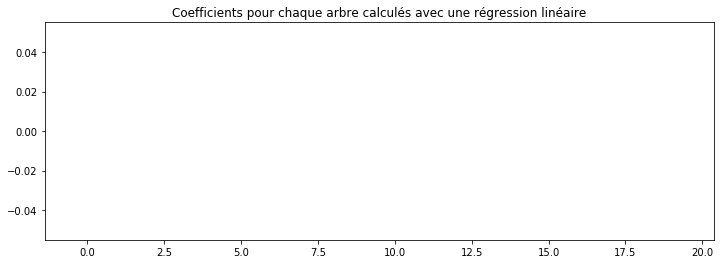

In [221]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.bar(np.arange(0, len(lasso.coef_)), lasso.coef_)
ax.set_title("Coefficients pour chaque arbre calculés avec une régression linéaire");

## Q5 : Tracer l'évolution de la performance et du nombre d'arbres en fonction de alpha

In [230]:
alphas_array = 10 ** np.linspace(-2, 1, 100)

In [231]:
alphas_array

array([ 0.01      ,  0.01072267,  0.01149757,  0.01232847,  0.01321941,
        0.01417474,  0.01519911,  0.01629751,  0.01747528,  0.01873817,
        0.02009233,  0.02154435,  0.0231013 ,  0.02477076,  0.02656088,
        0.02848036,  0.03053856,  0.03274549,  0.03511192,  0.03764936,
        0.04037017,  0.04328761,  0.04641589,  0.04977024,  0.05336699,
        0.05722368,  0.06135907,  0.06579332,  0.07054802,  0.07564633,
        0.08111308,  0.0869749 ,  0.09326033,  0.1       ,  0.10722672,
        0.1149757 ,  0.12328467,  0.13219411,  0.14174742,  0.15199111,
        0.16297508,  0.17475284,  0.18738174,  0.2009233 ,  0.21544347,
        0.23101297,  0.24770764,  0.26560878,  0.28480359,  0.30538555,
        0.32745492,  0.35111917,  0.37649358,  0.40370173,  0.43287613,
        0.46415888,  0.49770236,  0.53366992,  0.57223677,  0.61359073,
        0.65793322,  0.70548023,  0.75646333,  0.81113083,  0.869749  ,
        0.93260335,  1.        ,  1.07226722,  1.149757  ,  1.23

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 120.81it/s]


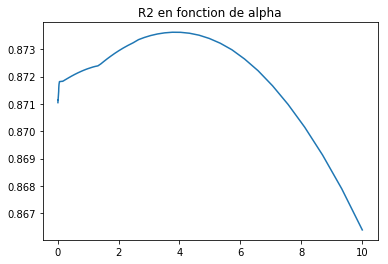

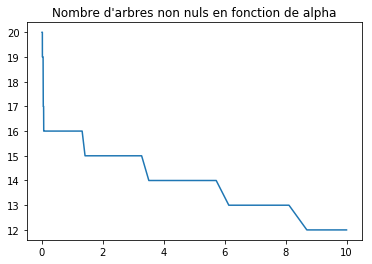

In [246]:
from tqdm import tqdm

r2_list= []
arbres_non_nuls = []

for alpha_test in tqdm(alphas_array):
    
    lasso = Lasso(alpha=alpha_test, max_iter = 10000)
    
    lasso.fit(X_train_2, y_train)
    
    r2_list.append(r2_score(y_test, lasso.predict(X_test_2)))
    arbres_non_nuls.append((np.abs(lasso.coef_) > 0).sum())

plt.plot(alphas_array, r2_list)
plt.title("R2 en fonction de alpha")
plt.show()

plt.plot(alphas_array, arbres_non_nuls)
plt.title("Nombre d'arbres non nuls en fonction de alpha")
plt.show()


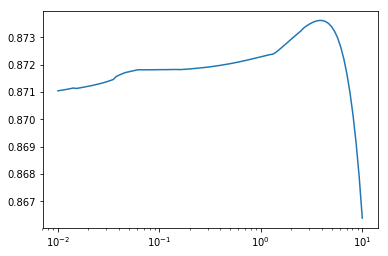

In [237]:
plt.plot(alphas_array, r2_list)
plt.xscale('log')
plt.show()

12